<a href="https://colab.research.google.com/github/Kamilmerito/Projets-ML/blob/main/learnia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prédire le prix du logement airbnb**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%%bash
# Nous allons créer un dossier dont le chemin est /opt/airbnb/data
mkdir -p ~/airbnb/data
wget https://blent-learning-user-ressources.s3.eu-west-3.amazonaws.com/training/data_scientist_airbnb/data/listings.csv \
    -q -O  ~/airbnb/data/listings.csv
wget https://blent-learning-user-ressources.s3.eu-west-3.amazonaws.com/training/data_scientist_airbnb/data/prices.csv \
    -q -O  ~/airbnb/data/prices.csv

In [ ]:
# Chargement du fichier listings (sep permet de dire que le séparateur est le point-virgule)
listings = pd.read_csv("~/airbnb/data/listings.csv", sep=";")
# Chargement du fichier prices
prices = pd.read_csv("~/airbnb/data/prices.csv", sep=";")

In [ ]:
listings.head()

,listing_id,name,summary,description,host_verifications,neighbourhood,neighbourhood_cleansed,city,zipcode,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready
0,6884149,Charming apartment CANAL ST MARTIN,THE PERFECT PLACE FOR A ROMANTIC STAY : EXCEPT...,THE PERFECT PLACE FOR A ROMANTIC STAY : EXCEPT...,"['email', 'phone', 'facebook', 'reviews']",Canal Saint-Martin,Entrepôt,Paris,75010,France,48.87883,2.36502,f,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",3,1125,0,NaN,f,f
1,14837925,Bedroom in a quiet flat in center of Paris.,Grand appartement très calme en plein centre d...,We are 5 roommates living together in a huge a...,"['email', 'phone', 'facebook', 'reviews']",Gare du Nord - Gare de I'Est,Entrepôt,Paris,75010,France,48.88234,2.35076,t,Apartment,Private room,2,2.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,""Suitable for events"",W...",1,2,10,91.0,t,f
2,7599950,Charming Small Studio by Saint-Augustin Church,Perfect location for this small studio which i...,Perfect location for this small studio which i...,"['email', 'phone', 'reviews', 'jumio', 'govern...",Saint-Lazare,Élysée,Paris,75008,France,48.87870,2.31928,t,Apartment,Entire home/apt,1,0.5,0.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Essentials,Hang...",1,1125,302,88.0,f,f
3,36169114,Charmant 2 pièces proche Quartier Latin,Appartement 2 pièces de 40 m² à deux pas du Qu...,Appartement 2 pièces de 40 m² à deux pas du Qu...,"['email', 'phone', 'reviews']",XIII Arrondissement,Gobelins,Paris,75013,France,48.83628,2.34670,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Kitchen,Heating,""Smoke detector"",Essentials,H...",4,1125,2,90.0,f,f
4,6465648,Quartier Latin - Havre de paix,"Petit havre de paix, dans une petite rue pavée...","Petit havre de paix, dans une petite rue pavée...","['email', 'phone', 'reviews', 'jumio', 'govern...",Panthéon,Panthéon,Paris,75005,France,48.84675,2.35354,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,""Buzzer/wir...",7,1125,0,NaN,t,f


In [ ]:
listings.shape

(10000, 27)

Nous avons au total 27 colonnes pour chaque logement. Nous voyons apparaître certaines informations telles que la description, le quartier ou encore le code postal. Il y a en revanche une colonne particulière : c'est listing_id. Sur Airbnb, un listing correspond à un logement, et puisque chaque logement est unique, la variable listing_id est un identifiant (équivalent aux clés primaires dans les bases de données) lié à un seul et unique logement. Ainsi, pour savoir quel logement précisément on observe, il faut se référer au listing_id.

In [ ]:
prices.head()

,listing_id,date,available,price,minimum_nights
0,3109,2020-05-13,True,107.0,2.0
1,3109,2020-05-14,True,107.0,2.0
2,3109,2020-05-15,True,107.0,2.0
3,3109,2020-05-16,True,107.0,2.0
4,3109,2020-05-17,True,107.0,2.0


In [ ]:
prices.shape

(3650095, 5)

In [ ]:
prices['date'] = pd.to_datetime(prices['date'])

In [ ]:
prices.index

RangeIndex(start=0, stop=3650095, step=1)

In [ ]:
listings.index

RangeIndex(start=0, stop=10000, step=1)

In [ ]:
listings_prices= prices[prices.index.isin(listings.index)]

In [ ]:
assert listings.shape[0] == listings_prices.shape[0]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Import de la librairie Seaborn
import seaborn as sns

# Cette commande permet d'agrandir par défaut la taille des graphiques
# (12 pouces de largeur et 7 pouces de longueur)
sns.set(rc={'figure.figsize':(12,7)})

In [ ]:
listings = pd.read_csv("~/airbnb/data/listings.csv", sep=";")
listings.head()

,listing_id,name,summary,description,host_verifications,neighbourhood,neighbourhood_cleansed,city,zipcode,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready
0,6884149,Charming apartment CANAL ST MARTIN,THE PERFECT PLACE FOR A ROMANTIC STAY : EXCEPT...,THE PERFECT PLACE FOR A ROMANTIC STAY : EXCEPT...,"['email', 'phone', 'facebook', 'reviews']",Canal Saint-Martin,Entrepôt,Paris,75010,France,48.87883,2.36502,f,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",3,1125,0,NaN,f,f
1,14837925,Bedroom in a quiet flat in center of Paris.,Grand appartement très calme en plein centre d...,We are 5 roommates living together in a huge a...,"['email', 'phone', 'facebook', 'reviews']",Gare du Nord - Gare de I'Est,Entrepôt,Paris,75010,France,48.88234,2.35076,t,Apartment,Private room,2,2.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,""Suitable for events"",W...",1,2,10,91.0,t,f
2,7599950,Charming Small Studio by Saint-Augustin Church,Perfect location for this small studio which i...,Perfect location for this small studio which i...,"['email', 'phone', 'reviews', 'jumio', 'govern...",Saint-Lazare,Élysée,Paris,75008,France,48.87870,2.31928,t,Apartment,Entire home/apt,1,0.5,0.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Essentials,Hang...",1,1125,302,88.0,f,f
3,36169114,Charmant 2 pièces proche Quartier Latin,Appartement 2 pièces de 40 m² à deux pas du Qu...,Appartement 2 pièces de 40 m² à deux pas du Qu...,"['email', 'phone', 'reviews']",XIII Arrondissement,Gobelins,Paris,75013,France,48.83628,2.34670,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Kitchen,Heating,""Smoke detector"",Essentials,H...",4,1125,2,90.0,f,f
4,6465648,Quartier Latin - Havre de paix,"Petit havre de paix, dans une petite rue pavée...","Petit havre de paix, dans une petite rue pavée...","['email', 'phone', 'reviews', 'jumio', 'govern...",Panthéon,Panthéon,Paris,75005,France,48.84675,2.35354,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,""Buzzer/wir...",7,1125,0,NaN,t,f


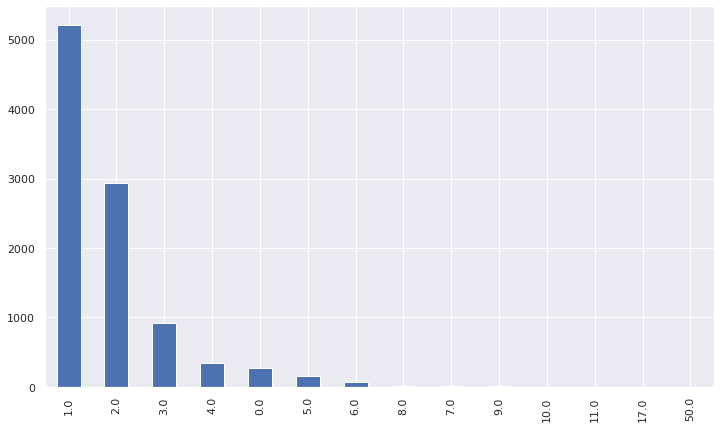

In [ ]:
# La fonction .plot.bar() affiche le diagramme en bâton correspondant
listings['beds'].value_counts().plot.bar()

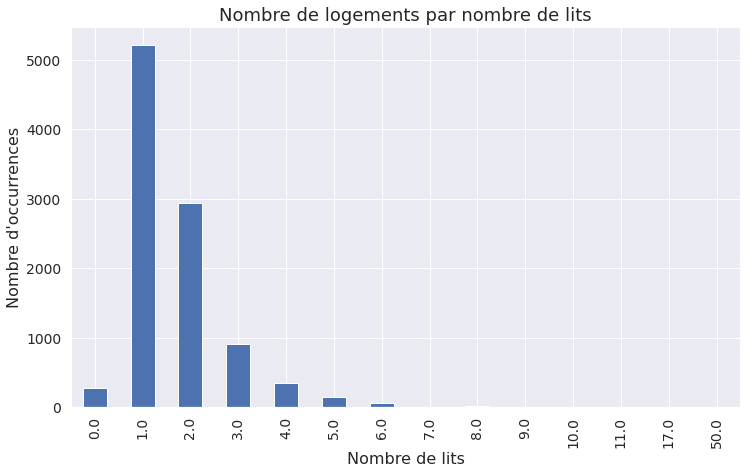

In [ ]:
# La fonction sort_index permet de trier dans l'ordre croissant le nombre de lits
ax = listings['beds'].value_counts().sort_index().plot.bar()

# C'est important de toujours mettre des titres et des noms d'axes
ax.set_xlabel("Nombre de lits", fontsize=16)
ax.set_ylabel("Nombre d'occurrences", fontsize=16)
ax.set_title("Nombre de logements par nombre de lits", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)  # Pour augmenter la taille de police des axes

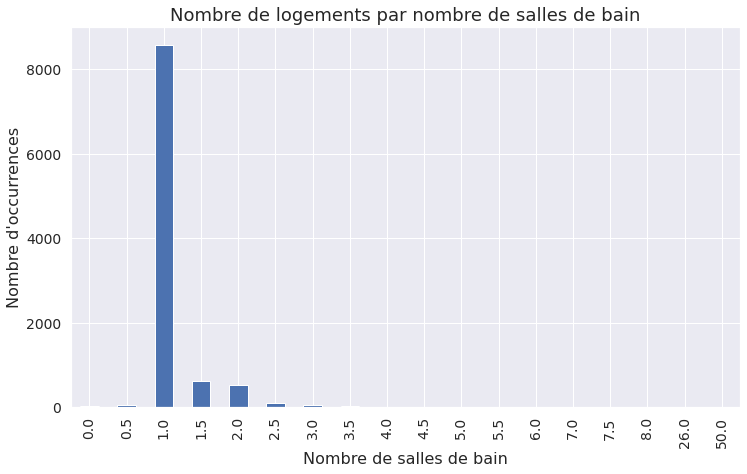

In [ ]:
ax = listings['bathrooms'].value_counts().sort_index().plot.bar()

ax.set_xlabel("Nombre de salles de bain", fontsize=16)
ax.set_ylabel("Nombre d'occurrences", fontsize=16)
ax.set_title("Nombre de logements par nombre de salles de bain", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)

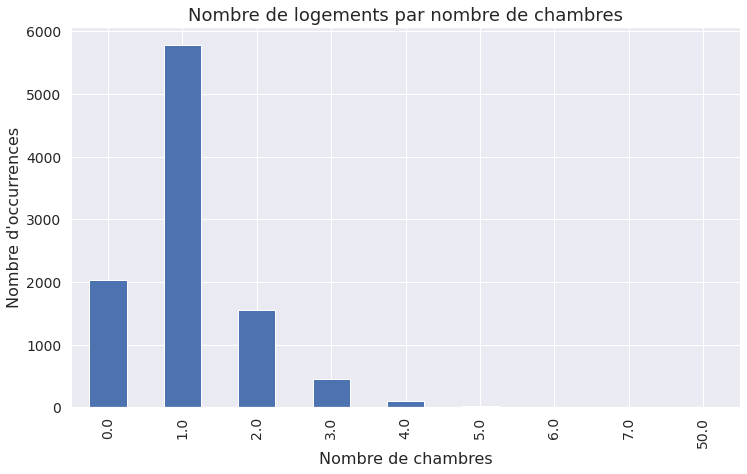

In [ ]:
ax = listings['bedrooms'].value_counts().sort_index().plot.bar()

ax.set_xlabel("Nombre de chambres", fontsize=16)
ax.set_ylabel("Nombre d'occurrences", fontsize=16)
ax.set_title("Nombre de logements par nombre de chambres", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)

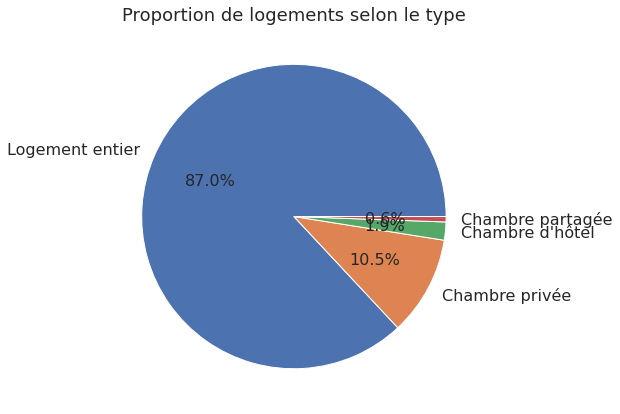

In [ ]:
labels = ["Logement entier", "Chambre privée", "Chambre d'hôtel", "Chambre partagée"]

ax = listings['room_type'].value_counts().plot.pie(
    labels=labels, # On renomme les valeurs entire_home, private_room, ...
    autopct=lambda x: "{:2.1f}%".format(x), # Permet d'afficher des pourcentages
    textprops={'fontsize': 16} # Pour afficher les types de logement en plus grand
)

ax.set_ylabel("") # Pas de titre pour l'axe vertical !
ax.set_title("Proportion de logements selon le type", fontsize=18)
plt.show()

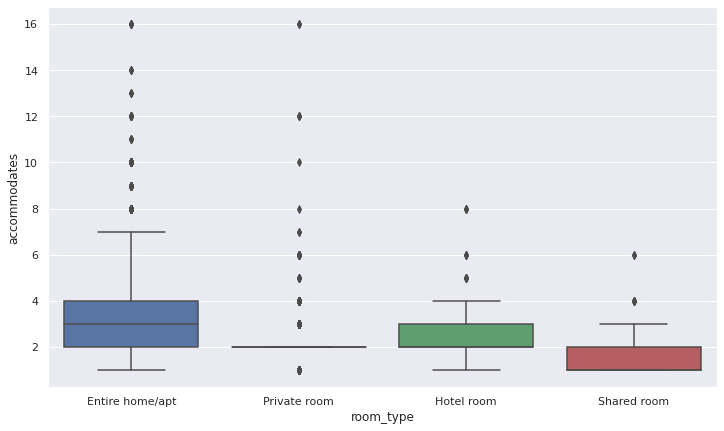

In [ ]:
sns.boxplot(x='room_type', y='accommodates', data=listings)

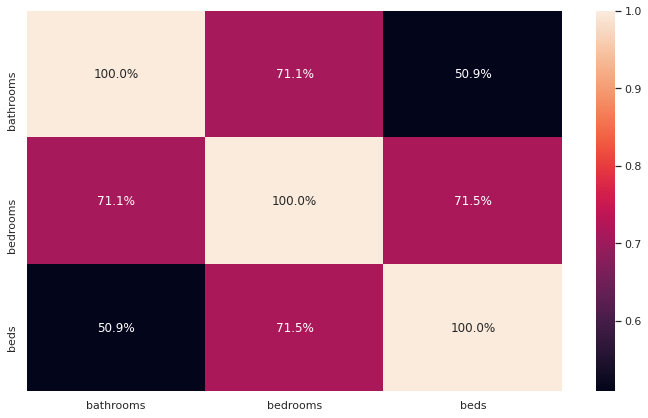

In [ ]:
correlation = listings[['bathrooms', 'bedrooms', 'beds']].corr()

sns.heatmap(
    correlation,
    fmt=".1%", # Permet d'afficher des pourcentages
    annot=True)

**Series temporelles**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import de la librairie Seaborn
import seaborn as sns

sns.set(rc={'figure.figsize':(12,7)})

from datetime import datetime

In [ ]:
listings = pd.read_csv("~/airbnb/data/listings.csv", sep=";").set_index('listing_id')
prices = pd.read_csv("~/airbnb/data/prices.csv", sep=";").set_index('listing_id')
print("Chargement des données effectué.")

Chargement des données effectué.


In [ ]:
# Observons les lignes ayant au moins une valeur manquante sur ces trois variables
listings[
    (listings['bathrooms'].isna()) |
    (listings['bedrooms'].isna()) |
    (listings['beds'].isna())
].iloc[:, 12:]

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready
listing_id,,,,,,,,,,,,,,
5956251,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"{Wifi,Kitchen,""Pets allowed"",Heating,""Smoke de...",3,28,23,75.0,t,f
42225132,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,"{Wifi,Kitchen,Heating,Washer,Essentials,Hanger...",2,1125,0,NaN,f,f
26175977,Boutique hotel,Hotel room,4,1.0,1.0,NaN,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Elevato...",1,1125,0,NaN,t,f
42583565,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,"{Wifi,Kitchen,""Smoking allowed"",Elevator,Heati...",1,1125,0,NaN,f,f
35898750,Boutique hotel,Hotel room,2,1.0,1.0,NaN,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Elevato...",1,1125,0,NaN,t,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42488606,Apartment,Entire home/apt,2,1.0,NaN,NaN,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Essentials,Sham...",5,1125,3,87.0,t,f
42600688,Hostel,Shared room,1,1.0,1.0,NaN,Real Bed,"{Wifi,""Air conditioning"",Heating,""Smoke detect...",1,365,0,NaN,t,f
35447743,Boutique hotel,Hotel room,2,1.0,1.0,NaN,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Heating...",1,1125,1,80.0,t,f


In [ ]:
listings[
    (listings['beds'].isna())
].iloc[:, 12:]

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready
listing_id,,,,,,,,,,,,,,
42225132,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,"{Wifi,Kitchen,Heating,Washer,Essentials,Hanger...",2,1125,0,NaN,f,f
26175977,Boutique hotel,Hotel room,4,1.0,1.0,NaN,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Elevato...",1,1125,0,NaN,t,f
42583565,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,"{Wifi,Kitchen,""Smoking allowed"",Elevator,Heati...",1,1125,0,NaN,f,f
35898750,Boutique hotel,Hotel room,2,1.0,1.0,NaN,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Elevato...",1,1125,0,NaN,t,f
272269,Apartment,Entire home/apt,4,NaN,2.0,NaN,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",2,365,108,95.0,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42488606,Apartment,Entire home/apt,2,1.0,NaN,NaN,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Essentials,Sham...",5,1125,3,87.0,t,f
42600688,Hostel,Shared room,1,1.0,1.0,NaN,Real Bed,"{Wifi,""Air conditioning"",Heating,""Smoke detect...",1,365,0,NaN,t,f
35447743,Boutique hotel,Hotel room,2,1.0,1.0,NaN,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Heating...",1,1125,1,80.0,t,f


In [ ]:
# On convertit la colonne date
prices['date'] = pd.to_datetime(prices['date'])

In [ ]:
# regardons quelques observations
prices.iloc[:10, :]

,date,available,price,minimum_nights
listing_id,,,,
3109,2020-05-13,True,107.0,2.0
3109,2020-05-14,True,107.0,2.0
3109,2020-05-15,True,107.0,2.0
3109,2020-05-16,True,107.0,2.0
3109,2020-05-17,True,107.0,2.0
3109,2020-05-18,True,107.0,2.0
3109,2020-05-19,True,107.0,2.0
3109,2020-05-20,True,107.0,2.0
3109,2020-05-21,True,107.0,2.0


In [ ]:
listings_prices = prices[prices.index.isin(listings.index)]
listings_prices.iloc[:10, :]

,date,available,price,minimum_nights
listing_id,,,,
3109,2020-05-13,True,107.0,2.0
3109,2020-05-14,True,107.0,2.0
3109,2020-05-15,True,107.0,2.0
3109,2020-05-16,True,107.0,2.0
3109,2020-05-17,True,107.0,2.0
3109,2020-05-18,True,107.0,2.0
3109,2020-05-19,True,107.0,2.0
3109,2020-05-20,True,107.0,2.0
3109,2020-05-21,True,107.0,2.0


In [ ]:
listings_prices = prices[prices.index.isin(listings.index)]
listings_prices.iloc[:10, :]

,date,available,price,minimum_nights
listing_id,,,,
3109,2020-05-13,True,107.0,2.0
3109,2020-05-14,True,107.0,2.0
3109,2020-05-15,True,107.0,2.0
3109,2020-05-16,True,107.0,2.0
3109,2020-05-17,True,107.0,2.0
3109,2020-05-18,True,107.0,2.0
3109,2020-05-19,True,107.0,2.0
3109,2020-05-20,True,107.0,2.0
3109,2020-05-21,True,107.0,2.0


In [ ]:
assert prices.shape[0] == listings_prices.shape[0]

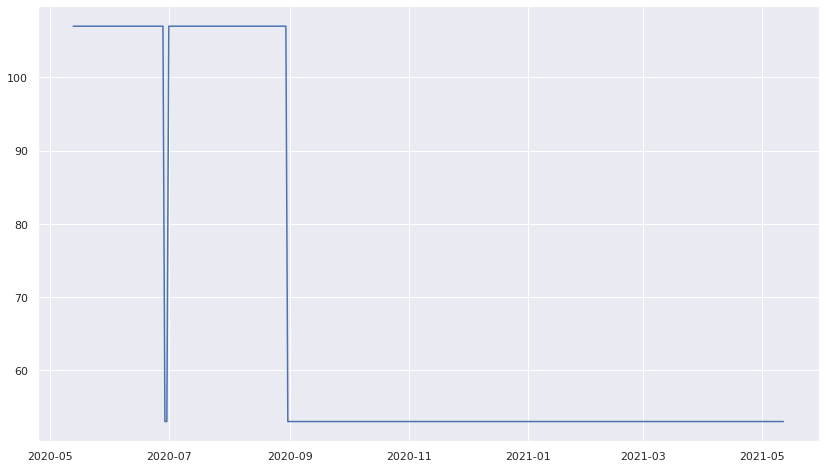

In [ ]:
# La fonction get_prices récupère la série des prix d'un logement dans l'ordre chronologique
def get_price(idx):
    series = prices[prices.index == idx]  # On récupère le bon prix associé au logement
    dates = np.asarray([ x for x in series["date"].values ])  # Les dates pour un bel affichage
    return dates, series["price"].values

# La fonction plot_prices affiche la série des prix d'un logement
def plot_price(idx):
    x, y = get_price(idx)
    
    plt.figure(figsize=(14, 8))  # Affichage plus grand dans le notebook
    plt.plot(x, y)

plot_price(3109)

In [ ]:
listings_index = np.unique(prices.index)
n_price_listings = len(listings_index)
n_price_listings

10000

**prix constant**

In [ ]:
sum(1 * (prices.groupby(by=['listing_id']).std()['price'] == 0)) / n_price_listings

0.5763

In [ ]:
prices_std = prices.groupby(by=['listing_id']).std()['price']

constant_listings = prices_std[prices_std == 0].index

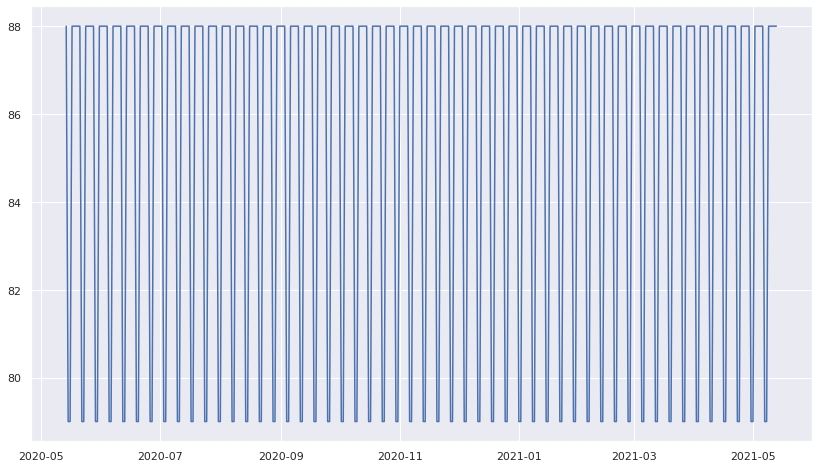

In [ ]:
#détection des saisonnalilté
plot_price(34799795)

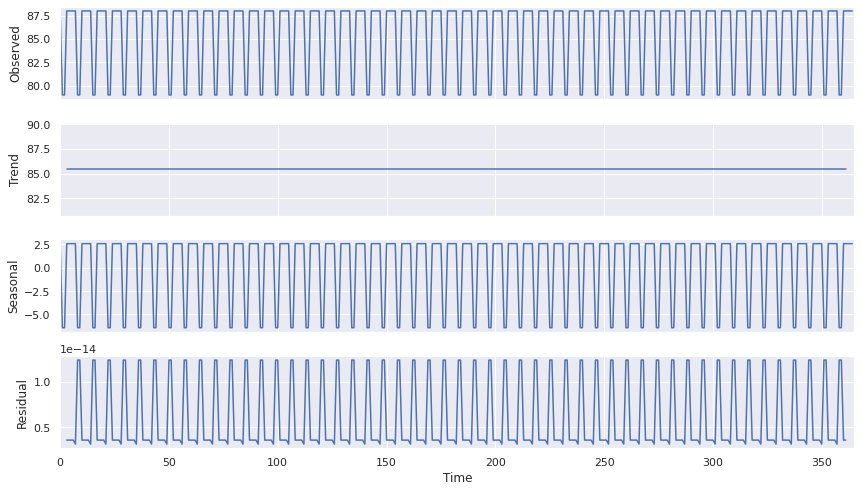

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

_, observed_prices = get_price(34799795)

result = seasonal_decompose(observed_prices, model='additive',freq=7)
result.plot()
plt.show()

In [ ]:
seasonal_listings = []

# Il faut être un peu patient pour itérer sur les 10 000 logements
for idx in np.setdiff1d(listings_index, constant_listings): # On récupère que les logements dont le prix n'est pas constant
    try:
        # On récupère les prix du logement
        _, observed_prices = get_price(idx)
        result = seasonal_decompose(observed_prices, model='additive', period=7)
        # On calcule l'écart-type de la tendance linéaire et de la saisonnalité
        std_linear = np.nanstd(result.trend)
        std_season = np.nanstd(result.seasonal)

        # On défini des seuils à partir desquels le logement possède un prix avec un saisonnalité
        if std_linear < 1 and std_season > 1:
            seasonal_listings.append(idx)
    except:
        print("Erreur avec le listing {}".format(idx))

Erreur avec le listing 3109
Erreur avec le listing 7397
Erreur avec le listing 17287
Erreur avec le listing 21282
Erreur avec le listing 21419
Erreur avec le listing 21860
Erreur avec le listing 53923
Erreur avec le listing 69588
Erreur avec le listing 72427
Erreur avec le listing 78366
Erreur avec le listing 108591
Erreur avec le listing 122179
Erreur avec le listing 122222
Erreur avec le listing 153190
Erreur avec le listing 154292
Erreur avec le listing 214578
Erreur avec le listing 222707
Erreur avec le listing 227846
Erreur avec le listing 250378
Erreur avec le listing 252525
Erreur avec le listing 257214
Erreur avec le listing 262455
Erreur avec le listing 272351
Erreur avec le listing 275219
Erreur avec le listing 281965
Erreur avec le listing 310765
Erreur avec le listing 312437
Erreur avec le listing 332253
Erreur avec le listing 334395
Erreur avec le listing 342902
Erreur avec le listing 343721
Erreur avec le listing 344366
Erreur avec le listing 354929
Erreur avec le listing

In [ ]:
len(seasonal_listings) / (n_price_listings - 7)

0.0

In [ ]:
listings_index

array([    3109,     7397,     7964, ..., 43393321, 43393328, 43393576])

In [ ]:
non_pattern_listings = np.setdiff1d(listings_index, seasonal_listings)
non_pattern_listings = np.setdiff1d(non_pattern_listings, constant_listings)
len(non_pattern_listings)

4237

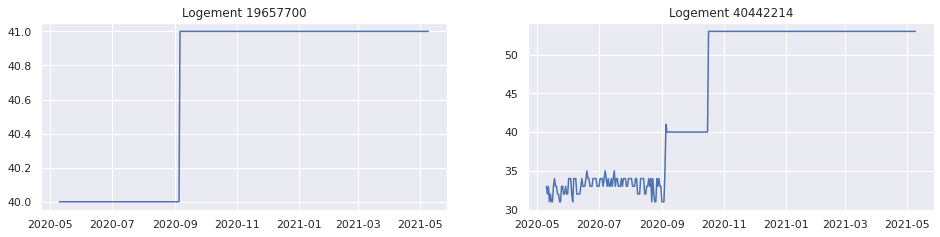

In [ ]:
plt.figure(figsize=(16,20))
sample_index = np.random.choice(non_pattern_listings, 10)

for i in range(2):
    fig = plt.subplot(5, 2, i + 1)
    dates, observed_prices = get_price(sample_index[i])

    fig.plot(dates, observed_prices)  
    fig.set_title("Logement {}".format(sample_index[i]))
    
plt.show()

**Regroupement par plages de dates**

In [ ]:
dates = pd.to_datetime(prices["date"], format='%Y-%m-%d')

week_prices = prices.reset_index() \
    .set_index(dates).groupby(
        ['listing_id', pd.Grouper(key='date', freq='7D')]
    ).mean() \
    .reset_index("date") \
    .loc[:, ["date", "price"]]

week_prices['week_number'] = week_prices['date'].dt.week
week_prices.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


,date,price,week_number
listing_id,,,
3109,2020-05-10,107.0,19
3109,2020-05-17,107.0,20
3109,2020-05-24,107.0,21
3109,2020-05-31,107.0,22
3109,2020-06-07,107.0,23


In [ ]:
week_prices.to_csv("~/airbnb/data/week_prices.csv", sep=";")

**Encodage**

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,7)})

In [ ]:
listings = pd.read_csv("~/airbnb/data/listings.csv", sep=";").set_index('listing_id')
listings.head()

,name,summary,description,host_verifications,neighbourhood,neighbourhood_cleansed,city,zipcode,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready
listing_id,,,,,,,,,,,,,,,,,,,,,,,,,,
6884149,Charming apartment CANAL ST MARTIN,THE PERFECT PLACE FOR A ROMANTIC STAY : EXCEPT...,THE PERFECT PLACE FOR A ROMANTIC STAY : EXCEPT...,"['email', 'phone', 'facebook', 'reviews']",Canal Saint-Martin,Entrepôt,Paris,75010,France,48.87883,2.36502,f,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",3,1125,0,NaN,f,f
14837925,Bedroom in a quiet flat in center of Paris.,Grand appartement très calme en plein centre d...,We are 5 roommates living together in a huge a...,"['email', 'phone', 'facebook', 'reviews']",Gare du Nord - Gare de I'Est,Entrepôt,Paris,75010,France,48.88234,2.35076,t,Apartment,Private room,2,2.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,""Suitable for events"",W...",1,2,10,91.0,t,f
7599950,Charming Small Studio by Saint-Augustin Church,Perfect location for this small studio which i...,Perfect location for this small studio which i...,"['email', 'phone', 'reviews', 'jumio', 'govern...",Saint-Lazare,Élysée,Paris,75008,France,48.87870,2.31928,t,Apartment,Entire home/apt,1,0.5,0.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Essentials,Hang...",1,1125,302,88.0,f,f
36169114,Charmant 2 pièces proche Quartier Latin,Appartement 2 pièces de 40 m² à deux pas du Qu...,Appartement 2 pièces de 40 m² à deux pas du Qu...,"['email', 'phone', 'reviews']",XIII Arrondissement,Gobelins,Paris,75013,France,48.83628,2.34670,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Kitchen,Heating,""Smoke detector"",Essentials,H...",4,1125,2,90.0,f,f
6465648,Quartier Latin - Havre de paix,"Petit havre de paix, dans une petite rue pavée...","Petit havre de paix, dans une petite rue pavée...","['email', 'phone', 'reviews', 'jumio', 'govern...",Panthéon,Panthéon,Paris,75005,France,48.84675,2.35354,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,""Buzzer/wir...",7,1125,0,NaN,t,f


In [ ]:
listings.isna().any()

name                         True
summary                      True
description                  True
host_verifications          False
neighbourhood                True
neighbourhood_cleansed      False
city                         True
zipcode                      True
country                     False
latitude                    False
longitude                   False
is_location_exact           False
property_type               False
room_type                   False
accommodates                False
bathrooms                    True
bedrooms                     True
beds                         True
bed_type                    False
amenities                   False
minimum_nights              False
maximum_nights              False
number_of_reviews           False
review_scores_rating         True
instant_bookable            False
is_business_travel_ready    False
dtype: bool

In [ ]:
# Observons les lignes ayant au moins une valeur manquante sur ces trois variables
listings[
    (listings['bathrooms'].isna()) |
    (listings['bedrooms'].isna()) |
    (listings['beds'].isna())
].iloc[:, 12:]

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready
listing_id,,,,,,,,,,,,,,
5956251,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"{Wifi,Kitchen,""Pets allowed"",Heating,""Smoke de...",3,28,23,75.0,t,f
42225132,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,"{Wifi,Kitchen,Heating,Washer,Essentials,Hanger...",2,1125,0,NaN,f,f
26175977,Boutique hotel,Hotel room,4,1.0,1.0,NaN,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Elevato...",1,1125,0,NaN,t,f
42583565,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,"{Wifi,Kitchen,""Smoking allowed"",Elevator,Heati...",1,1125,0,NaN,f,f
35898750,Boutique hotel,Hotel room,2,1.0,1.0,NaN,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Elevato...",1,1125,0,NaN,t,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42488606,Apartment,Entire home/apt,2,1.0,NaN,NaN,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Essentials,Sham...",5,1125,3,87.0,t,f
42600688,Hostel,Shared room,1,1.0,1.0,NaN,Real Bed,"{Wifi,""Air conditioning"",Heating,""Smoke detect...",1,365,0,NaN,t,f
35447743,Boutique hotel,Hotel room,2,1.0,1.0,NaN,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Heating...",1,1125,1,80.0,t,f


In [ ]:
listings[
    (listings['beds'].isna())
].iloc[:, 12:]

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready
listing_id,,,,,,,,,,,,,,
42225132,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,"{Wifi,Kitchen,Heating,Washer,Essentials,Hanger...",2,1125,0,NaN,f,f
26175977,Boutique hotel,Hotel room,4,1.0,1.0,NaN,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Elevato...",1,1125,0,NaN,t,f
42583565,Apartment,Private room,2,1.0,1.0,NaN,Real Bed,"{Wifi,Kitchen,""Smoking allowed"",Elevator,Heati...",1,1125,0,NaN,f,f
35898750,Boutique hotel,Hotel room,2,1.0,1.0,NaN,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Elevato...",1,1125,0,NaN,t,f
272269,Apartment,Entire home/apt,4,NaN,2.0,NaN,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",2,365,108,95.0,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42488606,Apartment,Entire home/apt,2,1.0,NaN,NaN,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Essentials,Sham...",5,1125,3,87.0,t,f
42600688,Hostel,Shared room,1,1.0,1.0,NaN,Real Bed,"{Wifi,""Air conditioning"",Heating,""Smoke detect...",1,365,0,NaN,t,f
35447743,Boutique hotel,Hotel room,2,1.0,1.0,NaN,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Heating...",1,1125,1,80.0,t,f


Lorsque l'on ne peut pas directement remplir les valeurs manquantes, il est préférable de retirer ces observations du jeu de données puisque remplir artificiellement les valeurs ajouterai un biais.

In [ ]:
listings = listings[~listings['beds'].isna()]
listings

,name,summary,description,host_verifications,neighbourhood,neighbourhood_cleansed,city,zipcode,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready
listing_id,,,,,,,,,,,,,,,,,,,,,,,,,,
6884149,Charming apartment CANAL ST MARTIN,THE PERFECT PLACE FOR A ROMANTIC STAY : EXCEPT...,THE PERFECT PLACE FOR A ROMANTIC STAY : EXCEPT...,"['email', 'phone', 'facebook', 'reviews']",Canal Saint-Martin,Entrepôt,Paris,75010,France,48.87883,2.36502,f,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",3,1125,0,NaN,f,f
14837925,Bedroom in a quiet flat in center of Paris.,Grand appartement très calme en plein centre d...,We are 5 roommates living together in a huge a...,"['email', 'phone', 'facebook', 'reviews']",Gare du Nord - Gare de I'Est,Entrepôt,Paris,75010,France,48.88234,2.35076,t,Apartment,Private room,2,2.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,""Suitable for events"",W...",1,2,10,91.0,t,f
7599950,Charming Small Studio by Saint-Augustin Church,Perfect location for this small studio which i...,Perfect location for this small studio which i...,"['email', 'phone', 'reviews', 'jumio', 'govern...",Saint-Lazare,Élysée,Paris,75008,France,48.87870,2.31928,t,Apartment,Entire home/apt,1,0.5,0.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Essentials,Hang...",1,1125,302,88.0,f,f
36169114,Charmant 2 pièces proche Quartier Latin,Appartement 2 pièces de 40 m² à deux pas du Qu...,Appartement 2 pièces de 40 m² à deux pas du Qu...,"['email', 'phone', 'reviews']",XIII Arrondissement,Gobelins,Paris,75013,France,48.83628,2.34670,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Kitchen,Heating,""Smoke detector"",Essentials,H...",4,1125,2,90.0,f,f
6465648,Quartier Latin - Havre de paix,"Petit havre de paix, dans une petite rue pavée...","Petit havre de paix, dans une petite rue pavée...","['email', 'phone', 'reviews', 'jumio', 'govern...",Panthéon,Panthéon,Paris,75005,France,48.84675,2.35354,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,""Buzzer/wir...",7,1125,0,NaN,t,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33545878,Lovely pari’s,"Lovely 2 bedroom flat with 10m2 terrass, near ...","Lovely 2 bedroom flat with 10m2 terrass, near ...","['email', 'phone']",Batignolles,Batignolles-Monceau,Paris,75017.0,France,48.88778,2.32203,t,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Smoking allowed"",Heating,""Su...",4,5,1,100.0,t,f
3584785,"A luxurious, comfortable 6 SLEEPS","A luxurious, quiet and comfortable three bedro...","A luxurious, quiet and comfortable three bedro...","['email', 'phone', 'work_email']",XIX Arrondissement,Buttes-Chaumont,Paris,75019,France,48.88101,2.37285,t,Apartment,Entire home/apt,6,1.0,3.0,6.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",7,29,0,NaN,f,f
17331403,"Designer's space in Paris, close to Marais","Quiet, 2-room apartment (35m2), quiet with vie...","Quiet, 2-room apartment (35m2), quiet with vie...","['email', 'phone', 'reviews', 'jumio', 'offlin...",XI Arrondissement,Popincourt,Paris,75011.0,France,48.86273,2.36962,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Heating,Washer,""Smoke detector"",...",2,1125,4,100.0,f,f


In [ ]:
# Observons les lignes ayant au moins une valeur manquante sur ces trois variables
listings[
    (listings['bedrooms'].isna())
].iloc[:, 12:]

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready
listing_id,,,,,,,,,,,,,,
5956251,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"{Wifi,Kitchen,""Pets allowed"",Heating,""Smoke de...",3,28,23,75.0,t,f
38066835,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"{TV,Wifi,Kitchen,""Smoking allowed"",Heating,Ess...",2,1125,15,79.0,t,f
3443311,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"{Kitchen,Heating,Hangers,""Hair dryer"",Iron,""tr...",5,1125,3,87.0,f,f
40693648,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"{Wifi,Kitchen,""Smoking allowed"",Heating,""Smoke...",5,1125,1,NaN,t,f
40519187,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Kitchen,Elevator,Heating,""Smoke detector"",Ess...",1,1125,0,NaN,f,f
38819697,Boat,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Wifi,Kitchen,Breakfast,Heating,""Suitable for ...",10,365,0,NaN,f,f
43043252,Apartment,Entire home/apt,3,1.0,NaN,1.0,Real Bed,"{TV,Wifi,Kitchen,Heating,""Smoke detector"",Esse...",1,1125,4,90.0,t,f
40544517,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,"{TV,Wifi,Kitchen,Elevator,Heating,Washer,Essen...",15,1125,1,100.0,t,f
43147130,Condominium,Entire home/apt,2,1.0,NaN,2.0,Real Bed,"{TV,Wifi,Kitchen,Heating,Washer,""Smoke detecto...",1,1125,0,NaN,t,f


In [ ]:
listings.loc[
    (listings['bedrooms'].isna()) &
    (listings['beds'] == 1),
    'bedrooms'
] = 1

In [ ]:
listings = listings[~listings['bedrooms'].isna()]

In [ ]:
listings[
    (listings['bathrooms'].isna())
].iloc[:, 12:]

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready
listing_id,,,,,,,,,,,,,,
9924294,Apartment,Entire home/apt,4,NaN,2.0,2.0,Real Bed,"{TV,Wifi,Kitchen,Elevator,Heating,Washer,Dryer...",1,20,0,NaN,f,f


In [ ]:
listings = listings[~listings['bathrooms'].isna()]

In [ ]:
listings.isna().any()

name                         True
summary                      True
description                  True
host_verifications          False
neighbourhood                True
neighbourhood_cleansed      False
city                         True
zipcode                      True
country                     False
latitude                    False
longitude                   False
is_location_exact           False
property_type               False
room_type                   False
accommodates                False
bathrooms                   False
bedrooms                    False
beds                        False
bed_type                    False
amenities                   False
minimum_nights              False
maximum_nights              False
number_of_reviews           False
review_scores_rating         True
instant_bookable            False
is_business_travel_ready    False
dtype: bool

In [ ]:
prices = pd.read_csv("~/airbnb/data/week_prices.csv", sep=";").set_index('listing_id')
prices.head()

,date,price,week_number
listing_id,,,
3109,2020-05-10,107.0,19
3109,2020-05-17,107.0,20
3109,2020-05-24,107.0,21
3109,2020-05-31,107.0,22
3109,2020-06-07,107.0,23


In [ ]:
prices.isna().any()

date           False
price           True
week_number    False
dtype: bool

In [ ]:
prices[prices['price'].isna()]

,date,price,week_number
listing_id,,,
9253564,2020-05-10,NaN,19
9253564,2020-05-17,NaN,20
9253564,2020-05-24,NaN,21
9253564,2020-05-31,NaN,22
9253564,2020-06-07,NaN,23
...,...,...,...
42857570,2021-03-28,NaN,12
42857570,2021-04-04,NaN,13
42857570,2021-04-11,NaN,14


In [ ]:
prices = prices[~prices['price'].isna()]

In [ ]:
prices[prices['price'] == 0]

,date,price,week_number
listing_id,,,
571017,2020-05-10,0.0,19
571017,2020-05-17,0.0,20
571017,2020-05-24,0.0,21
571017,2020-05-31,0.0,22
571017,2020-06-07,0.0,23
...,...,...,...
43352475,2021-04-11,0.0,14
43352475,2021-04-18,0.0,15
43352475,2021-04-25,0.0,16


In [ ]:
prices = prices[prices['price'] != 0]

**Étude des valeurs aberrantes**

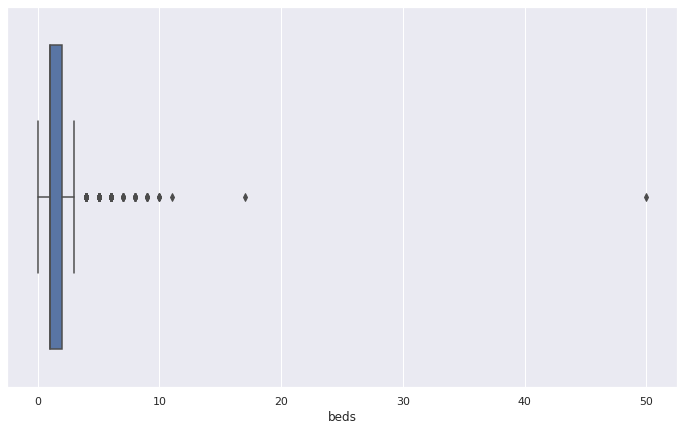

In [ ]:
sns.boxplot(x='beds', data=listings)

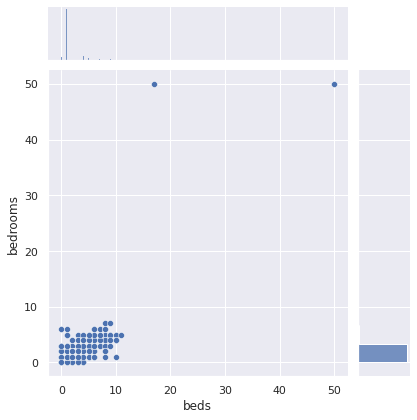

In [ ]:
sns.jointplot(x='beds', y='bedrooms', data=listings)

In [ ]:
listings[listings['beds'] > 12]

,name,summary,description,host_verifications,neighbourhood,neighbourhood_cleansed,city,zipcode,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready
listing_id,,,,,,,,,,,,,,,,,,,,,,,,,,
20433587,Hotel rooms heart of Saint-Germain des Prés Odeon,La Louisiane is an authentic hotel in the hear...,La Louisiane is an authentic hotel in the hear...,"['email', 'phone', 'google', 'reviews']",Saint-Germain-des-Prés - Odéon,Luxembourg,Paris,75006.0,France,48.85358,2.33680,t,Boutique hotel,Private room,16,50.0,50.0,50.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",1,400,132,89.0,f,f
18766792,Rooms heart of Saint-Germain des Prés Paris,La Louisiane is an authentic hotel in the hear...,La Louisiane is an authentic hotel in the hear...,"['email', 'phone', 'google', 'reviews']",VI Arrondissement,Luxembourg,Paris,75006.0,France,48.85384,2.33684,t,Boutique hotel,Private room,16,50.0,50.0,17.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",1,400,199,91.0,f,f


In [ ]:
listings = listings[listings['beds'] <= 12]

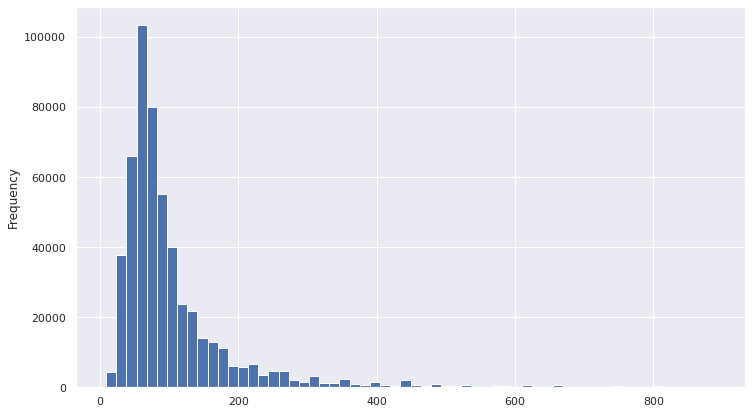

In [ ]:
prices['price'].plot.hist(bins=60)

In [ ]:
listings.to_csv("~/airbnb/data/listings_clean.csv", sep=";")
prices.to_csv("~/airbnb/data/prices_clean.csv", sep=";")

In [ ]:
#Encodage
import numpy as np
import pandas as pd

# Méthodes d'encodage que nous verrons dans un instant
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
# Attention à bien prendre les données "nettoyées" !
listings = pd.read_csv("~/airbnb/data/listings_clean.csv", sep=";").set_index('listing_id')
prices = pd.read_csv("~/airbnb/data/prices_clean.csv", sep=";").set_index('listing_id')
listings.iloc[0, :]

name                                       Charming apartment CANAL ST MARTIN
summary                     THE PERFECT PLACE FOR A ROMANTIC STAY : EXCEPT...
description                 THE PERFECT PLACE FOR A ROMANTIC STAY : EXCEPT...
host_verifications                  ['email', 'phone', 'facebook', 'reviews']
neighbourhood                                              Canal Saint-Martin
neighbourhood_cleansed                                               Entrepôt
city                                                                    Paris
zipcode                                                                 75010
country                                                                France
latitude                                                              48.8788
longitude                                                             2.36502
is_location_exact                                                           f
property_type                                                   

In [ ]:
listings['instant_bookable'] = 1 * (listings['instant_bookable'] == "t")
listings['is_business_travel_ready'] = 1 * (listings['instant_bookable'] == "t")
listings['is_location_exact'] = 1 * (listings['is_location_exact'] == "t")

In [ ]:
listings.iloc[0, :]

name                                       Charming apartment CANAL ST MARTIN
summary                     THE PERFECT PLACE FOR A ROMANTIC STAY : EXCEPT...
description                 THE PERFECT PLACE FOR A ROMANTIC STAY : EXCEPT...
host_verifications                  ['email', 'phone', 'facebook', 'reviews']
neighbourhood                                              Canal Saint-Martin
neighbourhood_cleansed                                               Entrepôt
city                                                                    Paris
zipcode                                                                 75010
country                                                                France
latitude                                                              48.8788
longitude                                                             2.36502
is_location_exact                                                           0
property_type                                                   

In [ ]:
# Encodeur pour le type de logement
property_type_encoder = LabelEncoder()

# Encodeur pour le type de lit
bed_type_encoder = LabelEncoder()

# fit_transform permet de faire d'une pierre deux coups : calibrer l'encodeur et l'appliquer
listings['property_type'] = property_type_encoder.fit_transform(listings['property_type'])
listings['bed_type'] = bed_type_encoder.fit_transform(listings['bed_type'])

In [ ]:
listings.iloc[0, :]

name                                       Charming apartment CANAL ST MARTIN
summary                     THE PERFECT PLACE FOR A ROMANTIC STAY : EXCEPT...
description                 THE PERFECT PLACE FOR A ROMANTIC STAY : EXCEPT...
host_verifications                  ['email', 'phone', 'facebook', 'reviews']
neighbourhood                                              Canal Saint-Martin
neighbourhood_cleansed                                               Entrepôt
city                                                                    Paris
zipcode                                                                 75010
country                                                                France
latitude                                                              48.8788
longitude                                                             2.36502
is_location_exact                                                           0
property_type                                                   

In [ ]:
property_type_encoder.classes_

array(['Aparthotel', 'Apartment', 'Bed and breakfast', 'Boat',
       'Boutique hotel', 'Bungalow', 'Campsite', 'Condominium', 'Cottage',
       'Guest suite', 'Guesthouse', 'Hostel', 'Hotel', 'House',
       'Houseboat', 'Loft', 'Nature lodge', 'Other', 'Serviced apartment',
       'Tiny house', 'Townhouse', 'Villa'], dtype=object)

In [ ]:
listings['room_type']=pd.get_dummies(listings['room_type'])
listings

,name,summary,description,host_verifications,neighbourhood,neighbourhood_cleansed,city,zipcode,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready
listing_id,,,,,,,,,,,,,,,,,,,,,,,,,,
6884149,Charming apartment CANAL ST MARTIN,THE PERFECT PLACE FOR A ROMANTIC STAY : EXCEPT...,THE PERFECT PLACE FOR A ROMANTIC STAY : EXCEPT...,"['email', 'phone', 'facebook', 'reviews']",Canal Saint-Martin,Entrepôt,Paris,75010,France,48.87883,2.36502,0,1,1,4,1.0,1.0,2.0,4,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",3,1125,0,NaN,0,0
14837925,Bedroom in a quiet flat in center of Paris.,Grand appartement très calme en plein centre d...,We are 5 roommates living together in a huge a...,"['email', 'phone', 'facebook', 'reviews']",Gare du Nord - Gare de I'Est,Entrepôt,Paris,75010,France,48.88234,2.35076,1,1,0,2,2.0,1.0,1.0,4,"{Wifi,Kitchen,Elevator,""Suitable for events"",W...",1,2,10,91.0,1,0
7599950,Charming Small Studio by Saint-Augustin Church,Perfect location for this small studio which i...,Perfect location for this small studio which i...,"['email', 'phone', 'reviews', 'jumio', 'govern...",Saint-Lazare,Élysée,Paris,75008,France,48.87870,2.31928,1,1,1,1,0.5,0.0,1.0,4,"{Wifi,Kitchen,Elevator,Heating,Essentials,Hang...",1,1125,302,88.0,0,0
36169114,Charmant 2 pièces proche Quartier Latin,Appartement 2 pièces de 40 m² à deux pas du Qu...,Appartement 2 pièces de 40 m² à deux pas du Qu...,"['email', 'phone', 'reviews']",XIII Arrondissement,Gobelins,Paris,75013,France,48.83628,2.34670,1,1,1,4,1.0,1.0,2.0,4,"{Kitchen,Heating,""Smoke detector"",Essentials,H...",4,1125,2,90.0,0,0
6465648,Quartier Latin - Havre de paix,"Petit havre de paix, dans une petite rue pavée...","Petit havre de paix, dans une petite rue pavée...","['email', 'phone', 'reviews', 'jumio', 'govern...",Panthéon,Panthéon,Paris,75005,France,48.84675,2.35354,1,1,1,2,1.0,1.0,1.0,4,"{TV,Internet,Wifi,Kitchen,Elevator,""Buzzer/wir...",7,1125,0,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33545878,Lovely pari’s,"Lovely 2 bedroom flat with 10m2 terrass, near ...","Lovely 2 bedroom flat with 10m2 terrass, near ...","['email', 'phone']",Batignolles,Batignolles-Monceau,Paris,75017.0,France,48.88778,2.32203,1,1,1,3,1.0,1.0,1.0,4,"{TV,Wifi,Kitchen,""Smoking allowed"",Heating,""Su...",4,5,1,100.0,1,0
3584785,"A luxurious, comfortable 6 SLEEPS","A luxurious, quiet and comfortable three bedro...","A luxurious, quiet and comfortable three bedro...","['email', 'phone', 'work_email']",XIX Arrondissement,Buttes-Chaumont,Paris,75019,France,48.88101,2.37285,1,1,1,6,1.0,3.0,6.0,4,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",7,29,0,NaN,0,0
17331403,"Designer's space in Paris, close to Marais","Quiet, 2-room apartment (35m2), quiet with vie...","Quiet, 2-room apartment (35m2), quiet with vie...","['email', 'phone', 'reviews', 'jumio', 'offlin...",XI Arrondissement,Popincourt,Paris,75011.0,France,48.86273,2.36962,1,1,1,2,1.0,1.0,1.0,4,"{Wifi,Kitchen,Heating,Washer,""Smoke detector"",...",2,1125,4,100.0,0,0


In [ ]:
# Les aménités que l'on va uniquement récupérer
amenities_target = ['wifi', 'tv', 'internet', 'kitchen', 'paid_parking_off_premises',
                    'essentials', 'washer', 'patio_or_balcony']

# On crée une colonne initialisée à 0 pour chaque aménité
for amenity in amenities_target:
    listings[amenity] = 0

In [ ]:
listings.head()

,name,summary,description,host_verifications,neighbourhood,neighbourhood_cleansed,city,zipcode,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,wifi,tv,internet,kitchen,paid_parking_off_premises,essentials,washer,patio_or_balcony
listing_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6884149,Charming apartment CANAL ST MARTIN,THE PERFECT PLACE FOR A ROMANTIC STAY : EXCEPT...,THE PERFECT PLACE FOR A ROMANTIC STAY : EXCEPT...,"['email', 'phone', 'facebook', 'reviews']",Canal Saint-Martin,Entrepôt,Paris,75010,France,48.87883,2.36502,0,1,1,4,1.0,1.0,2.0,4,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",3,1125,0,NaN,0,0,0,0,0,0,0,0,0,0
14837925,Bedroom in a quiet flat in center of Paris.,Grand appartement très calme en plein centre d...,We are 5 roommates living together in a huge a...,"['email', 'phone', 'facebook', 'reviews']",Gare du Nord - Gare de I'Est,Entrepôt,Paris,75010,France,48.88234,2.35076,1,1,0,2,2.0,1.0,1.0,4,"{Wifi,Kitchen,Elevator,""Suitable for events"",W...",1,2,10,91.0,1,0,0,0,0,0,0,0,0,0
7599950,Charming Small Studio by Saint-Augustin Church,Perfect location for this small studio which i...,Perfect location for this small studio which i...,"['email', 'phone', 'reviews', 'jumio', 'govern...",Saint-Lazare,Élysée,Paris,75008,France,48.87870,2.31928,1,1,1,1,0.5,0.0,1.0,4,"{Wifi,Kitchen,Elevator,Heating,Essentials,Hang...",1,1125,302,88.0,0,0,0,0,0,0,0,0,0,0
36169114,Charmant 2 pièces proche Quartier Latin,Appartement 2 pièces de 40 m² à deux pas du Qu...,Appartement 2 pièces de 40 m² à deux pas du Qu...,"['email', 'phone', 'reviews']",XIII Arrondissement,Gobelins,Paris,75013,France,48.83628,2.34670,1,1,1,4,1.0,1.0,2.0,4,"{Kitchen,Heating,""Smoke detector"",Essentials,H...",4,1125,2,90.0,0,0,0,0,0,0,0,0,0,0
6465648,Quartier Latin - Havre de paix,"Petit havre de paix, dans une petite rue pavée...","Petit havre de paix, dans une petite rue pavée...","['email', 'phone', 'reviews', 'jumio', 'govern...",Panthéon,Panthéon,Paris,75005,France,48.84675,2.35354,1,1,1,2,1.0,1.0,1.0,4,"{TV,Internet,Wifi,Kitchen,Elevator,""Buzzer/wir...",7,1125,0,NaN,1,0,0,0,0,0,0,0,0,0


In [ ]:
def amenities_to_vector(row):
    # On récupère sous forme de liste les aménités
    amenity_list = row['amenities'].replace(" ", "_").lower()
    # Pour chaque aménité "cible"
    for amenity in amenities_target:
        if amenity in amenity_list:  # Si le logement possède cette aménité
            row[amenity] = 1
    return row

listings = listings.apply(amenities_to_vector, axis=1)
listings[['amenities'] + amenities_target]

,amenities,wifi,tv,internet,kitchen,paid_parking_off_premises,essentials,washer,patio_or_balcony
listing_id,,,,,,,,,
6884149,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",1,1,1,1,0,1,1,0
14837925,"{Wifi,Kitchen,Elevator,""Suitable for events"",W...",1,0,0,1,0,1,1,0
7599950,"{Wifi,Kitchen,Elevator,Heating,Essentials,Hang...",1,0,0,1,0,1,0,0
36169114,"{Kitchen,Heating,""Smoke detector"",Essentials,H...",0,0,0,1,0,1,1,0
6465648,"{TV,Internet,Wifi,Kitchen,Elevator,""Buzzer/wir...",1,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...
33545878,"{TV,Wifi,Kitchen,""Smoking allowed"",Heating,""Su...",1,1,0,1,0,1,1,0
3584785,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",1,1,1,1,0,1,1,0
17331403,"{Wifi,Kitchen,Heating,Washer,""Smoke detector"",...",1,0,0,1,0,1,1,0


In [ ]:
listings = listings.drop(
    ['name', 'summary', 'is_location_exact', 'description', 'host_verifications', 'neighbourhood',
    'neighbourhood_cleansed', 'city', 'zipcode', 'country', 'amenities', 'review_scores_rating',
    'review_scores_rating'],
    axis=1
)

In [ ]:
listings.head()

,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,is_business_travel_ready,wifi,tv,internet,kitchen,paid_parking_off_premises,essentials,washer,patio_or_balcony
listing_id,,,,,,,,,,,,,,,,,,,,,,
6884149,48.87883,2.36502,1,1,4,1.0,1.0,2.0,4,3,1125,0,0,0,1,1,1,1,0,1,1,0
14837925,48.88234,2.35076,1,0,2,2.0,1.0,1.0,4,1,2,10,1,0,1,0,0,1,0,1,1,0
7599950,48.87870,2.31928,1,1,1,0.5,0.0,1.0,4,1,1125,302,0,0,1,0,0,1,0,1,0,0
36169114,48.83628,2.34670,1,1,4,1.0,1.0,2.0,4,4,1125,2,0,0,0,0,0,1,0,1,1,0
6465648,48.84675,2.35354,1,1,2,1.0,1.0,1.0,4,7,1125,0,1,0,1,1,1,1,0,1,1,0


**Mutualisation des tables**

In [ ]:
# On retire la date puisque la temporalité est déjà captée par la variable week_number
dataset = listings.join(prices, how="inner").drop('date', axis=1)
dataset.head()

,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,is_business_travel_ready,wifi,tv,internet,kitchen,paid_parking_off_premises,essentials,washer,patio_or_balcony,price,week_number
listing_id,,,,,,,,,,,,,,,,,,,,,,,,
3109,48.83349,2.31852,1,1,2,1.0,0.0,1.0,4,2,30,9,0,0,1,0,1,1,1,0,1,0,107.0,19
3109,48.83349,2.31852,1,1,2,1.0,0.0,1.0,4,2,30,9,0,0,1,0,1,1,1,0,1,0,107.0,20
3109,48.83349,2.31852,1,1,2,1.0,0.0,1.0,4,2,30,9,0,0,1,0,1,1,1,0,1,0,107.0,21
3109,48.83349,2.31852,1,1,2,1.0,0.0,1.0,4,2,30,9,0,0,1,0,1,1,1,0,1,0,107.0,22
3109,48.83349,2.31852,1,1,2,1.0,0.0,1.0,4,2,30,9,0,0,1,0,1,1,1,0,1,0,107.0,23


In [ ]:
dataset.shape

(523552, 24)

In [ ]:
dataset.to_csv("~/airbnb/data/dataset.csv", sep=";")

In [ ]:
dataset.isna().any()

latitude                     False
longitude                    False
property_type                False
room_type                    False
accommodates                 False
bathrooms                    False
bedrooms                     False
beds                         False
bed_type                     False
minimum_nights               False
maximum_nights               False
number_of_reviews            False
instant_bookable             False
is_business_travel_ready     False
wifi                         False
tv                           False
internet                     False
kitchen                      False
paid_parking_off_premises    False
essentials                   False
washer                       False
patio_or_balcony             False
price                        False
week_number                  False
dtype: bool

**Modélisation**

In [ ]:
import pandas as pd

dataset = pd.read_csv("~/airbnb/data/dataset.csv", sep=";").set_index('listing_id')
dataset.head()

,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,is_business_travel_ready,wifi,tv,internet,kitchen,paid_parking_off_premises,essentials,washer,patio_or_balcony,price,week_number
listing_id,,,,,,,,,,,,,,,,,,,,,,,,
3109,48.83349,2.31852,1,1,2,1.0,0.0,1.0,4,2,30,9,0,0,1,0,1,1,1,0,1,0,107.0,19
3109,48.83349,2.31852,1,1,2,1.0,0.0,1.0,4,2,30,9,0,0,1,0,1,1,1,0,1,0,107.0,20
3109,48.83349,2.31852,1,1,2,1.0,0.0,1.0,4,2,30,9,0,0,1,0,1,1,1,0,1,0,107.0,21
3109,48.83349,2.31852,1,1,2,1.0,0.0,1.0,4,2,30,9,0,0,1,0,1,1,1,0,1,0,107.0,22
3109,48.83349,2.31852,1,1,2,1.0,0.0,1.0,4,2,30,9,0,0,1,0,1,1,1,0,1,0,107.0,23


In [ ]:
# Un rapide coup d'oeil pour être certain qu'il n'y a pas de valeurs manquantes
dataset.isna().any()

latitude                     False
longitude                    False
property_type                False
room_type                    False
accommodates                 False
bathrooms                    False
bedrooms                     False
beds                         False
bed_type                     False
minimum_nights               False
maximum_nights               False
number_of_reviews            False
instant_bookable             False
is_business_travel_ready     False
wifi                         False
tv                           False
internet                     False
kitchen                      False
paid_parking_off_premises    False
essentials                   False
washer                       False
patio_or_balcony             False
price                        False
week_number                  False
dtype: bool

In [ ]:
# On récupère les variables explicatives dans dans X
X = dataset.drop(['price'], axis=1)
# On récupère la variable réponse (le prix) dans y
y = dataset['price'].astype(int)

In [ ]:
 import numpy as np
 from sklearn.linear_model import LinearRegression

In [ ]:
# On crée l'objet de régression
regr = LinearRegression()
# On entraîne le modèle sur notre base d'apprentissage
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score # Métriques d'évaluation

# Les prédictions
y_pred = regr.predict(X)

print("Score R2 : {:2.1f}%".format(r2_score(y, y_pred) * 100))
print("Score MAE : {:2.1f}€".format(mean_absolute_error(y, y_pred)))

Score R2 : 41.0%
Score MAE : 41.5€


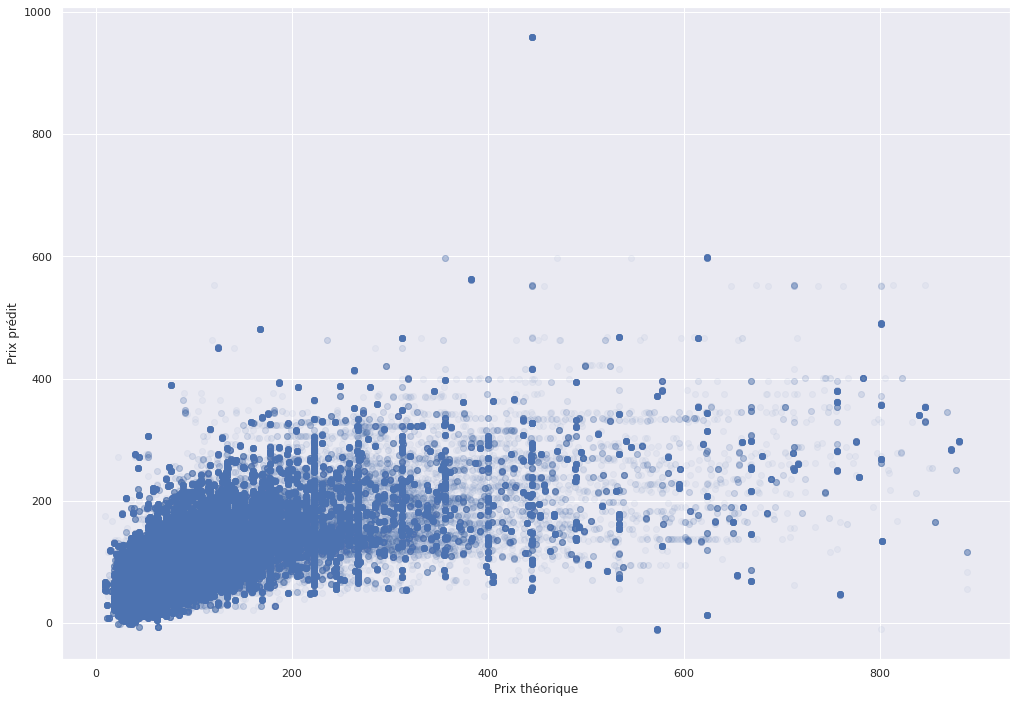

In [ ]:
plt.figure(figsize=(17,12))
plt.scatter(y, y_pred, alpha=0.05)
plt.xlabel("Prix théorique")
plt.ylabel("Prix prédit")
plt.show()

In [ ]:
#Construction de l'arbre de regression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error # Métriques d'évaluation

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

dataset = pd.read_csv("~/airbnb/data/dataset.csv", sep=";").set_index('listing_id')

In [ ]:
X = dataset.drop(['price'], axis=1)
y = dataset['price'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [ ]:
model = DecisionTreeRegressor(
    max_depth=12,
    min_samples_split=10
)
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=12,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
print("MAE train : {:2.1f}€".format(mean_absolute_error(y_train, model.predict(X_train))))
print("MAE test : {:2.1f}€".format(mean_absolute_error(y_test, model.predict(X_test))))

print("Score R2 train : {:2.1f}%".format(r2_score(y_train, model.predict(X_train)) * 100))
print("Score R2 test : {:2.1f}%".format(r2_score(y_test, model.predict(X_test)) * 100))

MAE train : 23.9€
MAE test : 24.0€
Score R2 train : 78.9%
Score R2 test : 78.7%


In [ ]:
model_perf = DecisionTreeRegressor(
    max_depth=18,
    min_samples_split=10
)
model_perf.fit(X_train, y_train)

print("MAE train : {:2.1f}€".format(mean_absolute_error(y_train, model_perf.predict(X_train))))
print("MAE test : {:2.1f}€".format(mean_absolute_error(y_test, model_perf.predict(X_test))))

print("Score R2 train : {:2.1f}%".format(r2_score(y_train, model_perf.predict(X_train)) * 100))
print("Score R2 test : {:2.1f}%".format(r2_score(y_test, model_perf.predict(X_test)) * 100))

MAE train : 9.5€
MAE test : 10.0€
Score R2 train : 94.9%
Score R2 test : 93.9%


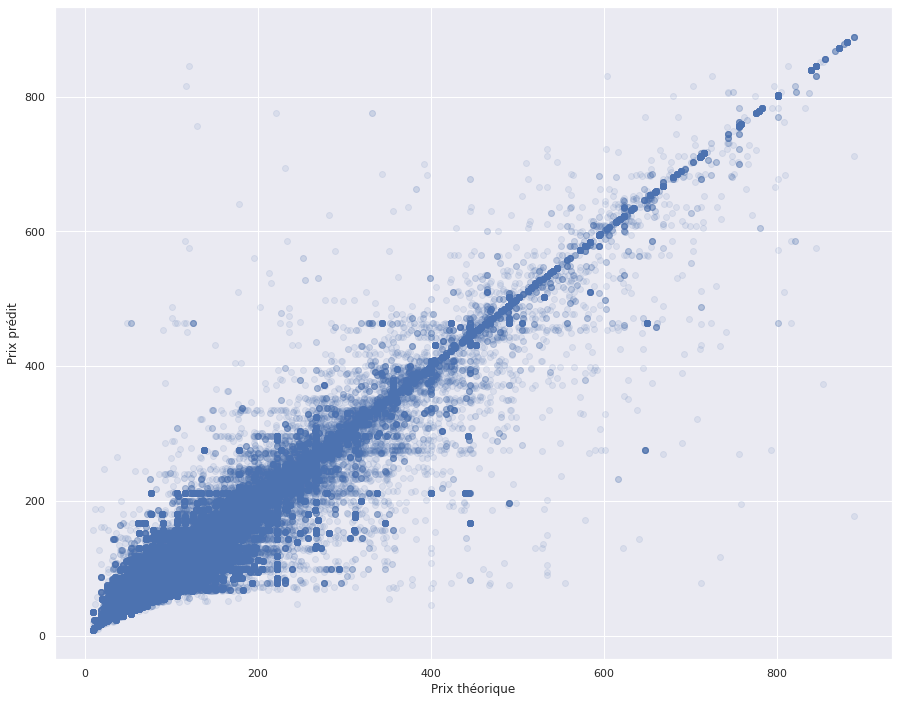

In [ ]:
y_pred = model_perf.predict(X)

plt.figure(figsize=(15,12))
plt.scatter(y, y_pred, alpha=0.1)
plt.xlabel("Prix théorique")
plt.ylabel("Prix prédit")
plt.show()

In [ ]:
import graphviz
from subprocess import call

tree.export_graphviz(model, out_file='tree.dot')

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

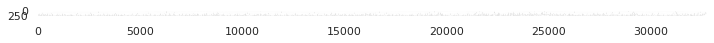

In [ ]:
from PIL import Image
from matplotlib.pyplot import imshow

plt.gca().grid(False)
imshow(Image.open("tree.png"))

In [ ]:
# On récupère les importances pour chaque variable
model.feature_importances_

array([0.108064  , 0.11114761, 0.07561799, 0.00910023, 0.04837727,
       0.30817549, 0.13537275, 0.02904561, 0.00075497, 0.03723649,
       0.03388145, 0.02852078, 0.00751334, 0.        , 0.00031459,
       0.00729643, 0.0076647 , 0.01118513, 0.00301154, 0.00492992,
       0.0049983 , 0.0146543 , 0.01313711])

In [ ]:
# On récupère les importances dans un DataFrame
features_imp = pd.DataFrame(
    data=np.asarray([X.columns, model.feature_importances_]).transpose(),
    columns=['Variable', 'Importance']
)
# On tri les importances dans l'ordre décroissant
features_imp = features_imp.sort_values('Importance', ascending=False)
features_imp

,Variable,Importance
5,bathrooms,0.308175
6,bedrooms,0.135373
1,longitude,0.111148
0,latitude,0.108064
2,property_type,0.075618
4,accommodates,0.0483773
9,minimum_nights,0.0372365
10,maximum_nights,0.0338815
7,beds,0.0290456
11,number_of_reviews,0.0285208


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

dataset = pd.read_csv("~/airbnb/data/dataset.csv", sep=";").set_index('listing_id')
dataset.head()

,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,is_business_travel_ready,wifi,tv,internet,kitchen,paid_parking_off_premises,essentials,washer,patio_or_balcony,price,week_number
listing_id,,,,,,,,,,,,,,,,,,,,,,,,
3109,48.83349,2.31852,1,1,2,1.0,0.0,1.0,4,2,30,9,0,0,1,0,1,1,1,0,1,0,107.0,19
3109,48.83349,2.31852,1,1,2,1.0,0.0,1.0,4,2,30,9,0,0,1,0,1,1,1,0,1,0,107.0,20
3109,48.83349,2.31852,1,1,2,1.0,0.0,1.0,4,2,30,9,0,0,1,0,1,1,1,0,1,0,107.0,21
3109,48.83349,2.31852,1,1,2,1.0,0.0,1.0,4,2,30,9,0,0,1,0,1,1,1,0,1,0,107.0,22
3109,48.83349,2.31852,1,1,2,1.0,0.0,1.0,4,2,30,9,0,0,1,0,1,1,1,0,1,0,107.0,23


In [ ]:
X = dataset.drop(['price'], axis=1)
y = dataset['price'].astype(int)

# random_state permet de "figer" l'aléatoire et donc de toujours récupérer les mêmes observations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [ ]:
i_sample = np.random.choice(range(len(X)), 50000)
X_subtrain, X_subtest, y_subtrain, y_subtest = train_test_split(
    X.iloc[i_sample, :],
    y.iloc[i_sample],
    test_size=0.3,
    random_state=24
)

reg_tree = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=10
)
reg_tree.fit(X_subtrain, y_subtrain)

print("MAE train : {:2.1f}€".format(mean_absolute_error(y_subtrain, reg_tree.predict(X_subtrain))))
print("MAE test : {:2.1f}€".format(mean_absolute_error(y_subtest, reg_tree.predict(X_subtest))))

print("Score R2 train : {:2.1f}%".format(r2_score(y_subtrain, reg_tree.predict(X_subtrain)) * 100))
print("Score R2 test : {:2.1f}%".format(r2_score(y_subtest, reg_tree.predict(X_subtest)) * 100))

MAE train : 28.4€
MAE test : 29.6€
Score R2 train : 71.8%
Score R2 test : 70.0%


In [ ]:
!pip install mlxtend

# Affiche MSE, biais et variance
# Ce calcul peut prendre plusieurs minutes
bias_variance_decomp(
    rf,
    X_subtrain.values,
    y_subtrain.values,
    X_subtest.values,
    y_subtest.values,
    loss="mse",
    num_rounds=100
)

#from mlxtend.evaluate import bias_variance_decomp

# Affiche MSE, biais et variance
bias_variance_decomp(
    reg_tree,
    X_subtrain.values,
    y_subtrain.values,
    X_subtest.values,
    y_subtest.values,
    loss="mse",
    num_rounds=100
)

**Boosting**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("~/airbnb/data/dataset.csv", sep=";").set_index('listing_id')

X = dataset.drop(['price'], axis=1)
y = dataset['price'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [ ]:
from xgboost import XGBRegressor

params = {
    'max_depth': 6,
    'learning_rate': 1,
    'objective':'reg:squarederror',
    'n_estimators': 40,
    'silent': False
}

booster = XGBRegressor(**params)
booster.fit(X_train, y_train, eval_metric='mae', eval_set = [(X_test, y_test)], verbose=True)

[0]	validation_0-mae:36.824
[1]	validation_0-mae:34.2802
[2]	validation_0-mae:33.3538
[3]	validation_0-mae:32.8294
[4]	validation_0-mae:31.9161
[5]	validation_0-mae:30.9756
[6]	validation_0-mae:30.5153
[7]	validation_0-mae:29.9373
[8]	validation_0-mae:29.5117
[9]	validation_0-mae:29.3081
[10]	validation_0-mae:28.9651
[11]	validation_0-mae:28.7222
[12]	validation_0-mae:28.4047
[13]	validation_0-mae:28.0261
[14]	validation_0-mae:27.7021
[15]	validation_0-mae:27.4771
[16]	validation_0-mae:27.2486
[17]	validation_0-mae:26.9087
[18]	validation_0-mae:26.5934
[19]	validation_0-mae:26.3215
[20]	validation_0-mae:26.0387
[21]	validation_0-mae:25.9536
[22]	validation_0-mae:25.9192
[23]	validation_0-mae:25.7975
[24]	validation_0-mae:25.6068
[25]	validation_0-mae:25.372
[26]	validation_0-mae:25.0679
[27]	validation_0-mae:24.7886
[28]	validation_0-mae:24.5483
[29]	validation_0-mae:24.2615
[30]	validation_0-mae:24.0799
[31]	validation_0-mae:23.8907
[32]	validation_0-mae:23.7075
[33]	validation_0-mae:

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=40,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=False, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

print("MAE train : {:2.1f}€".format(mean_absolute_error(y_train, booster.predict(X_train))))
print("MAE test : {:2.1f}€".format(mean_absolute_error(y_test, booster.predict(X_test))))

print("Score R2 train : {:2.1f}%".format(r2_score(y_train, booster.predict(X_train)) * 100))
print("Score R2 test : {:2.1f}%".format(r2_score(y_test, booster.predict(X_test)) * 100))

MAE train : 22.1€
MAE test : 22.5€
Score R2 train : 85.9%
Score R2 test : 85.3%


In [ ]:
from xgboost import XGBRegressor

params = {
    'gamma': 0,
    'learning_rate': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective':'reg:squarederror',
    'n_estimators': 40,
    'silent': False
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_parameters = {
    'max_depth': [3, 5, 8],
    'min_child_weight': [1, 3, 5]
}

grid_cv = GridSearchCV(
    estimator=XGBRegressor(**params),
    param_grid=grid_parameters,
    scoring="neg_mean_absolute_error",
    cv=2,
    verbose=2
)
# Lance la recherche par grille (peut prendre 5 minutes)
grid_cv.fit(X, y)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] max_depth=3, min_child_weight=1 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. max_depth=3, min_child_weight=1, total=   8.7s
[CV] max_depth=3, min_child_weight=1 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s


[CV] .................. max_depth=3, min_child_weight=1, total=   8.4s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] .................. max_depth=3, min_child_weight=3, total=   8.4s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] .................. max_depth=3, min_child_weight=3, total=   8.6s
[CV] max_depth=3, min_child_weight=5 .................................
[CV] .................. max_depth=3, min_child_weight=5, total=   8.7s
[CV] max_depth=3, min_child_weight=5 .................................
[CV] .................. max_depth=3, min_child_weight=5, total=   8.5s
[CV] max_depth=5, min_child_weight=1 .................................
[CV] .................. max_depth=5, min_child_weight=1, total=  13.3s
[CV] max_depth=5, min_child_weight=1 .................................
[CV] .................. max_depth=5, min_child_weight=1, total=  13.4s
[CV] max_depth=5, min_child_weight=3 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  4.3min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0,
                                    importance_type='gain', learning_rate=1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=40, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=False,
                                    subsample=0.8, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5, 8], 'min_child_weight': [1, 3, 5]},
             pre_dispatch='2*n_jobs', refit

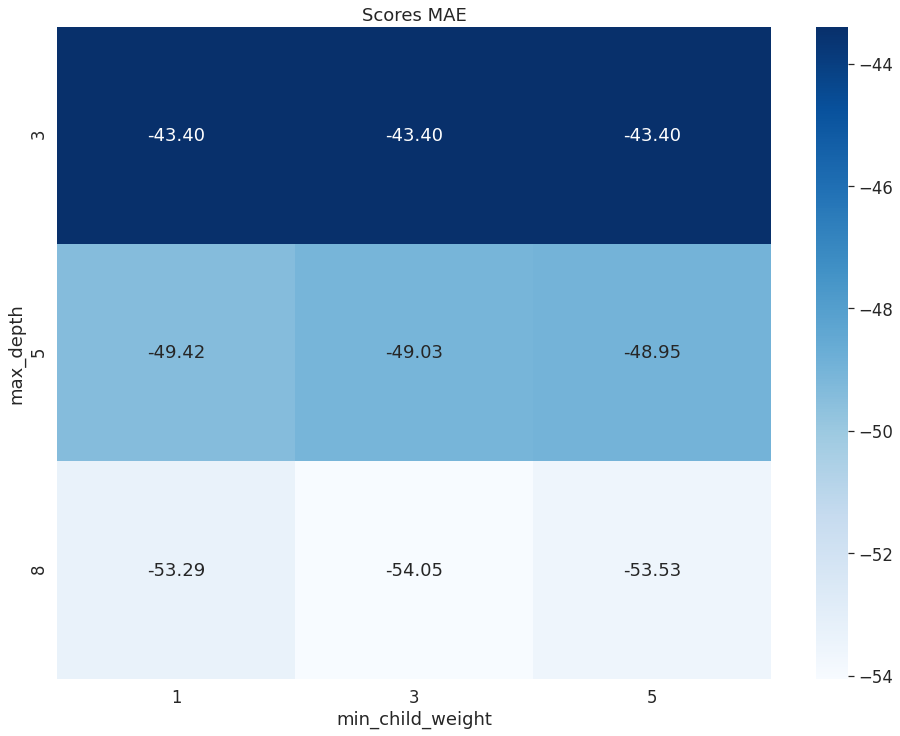

In [ ]:
from matplotlib.ticker import PercentFormatter

score_matrix = np.asarray(grid_cv.cv_results_["mean_test_score"]).reshape((3, 3))

sns.set(font_scale=1.5)

fig = plt.figure(figsize=(16, 12))
plt.title("Scores MAE")

ax = sns.heatmap(
    score_matrix,  # Matrice des scores
    annot=True,  # Afficher les scores
    fmt='.02f',  # Affichage avec 1 chiffre après la virgule
    yticklabels=grid_parameters["max_depth"],  # Nom de l'axe vertical
    xticklabels=grid_parameters["min_child_weight"],  # Nom de l'axe horizontal
    cmap="Blues",  # Palette de couleur
)

sns.set(font_scale=1)

ax.set(ylabel="max_depth", xlabel="min_child_weight")

plt.show()

In [ ]:
params = {
    # Déjà optimisé
    'max_depth': 8,
    'min_child_weight': 5,
    
    # Pas encore optimisé
    'gamma': 0,
    'learning_rate': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective':'reg:squarederror',
    'n_estimators': 40,
    'silent': False
}

grid_parameters = {
    'gamma': [0, 0.1, 0.5, 1, 10],
}

grid_cv_gamma = GridSearchCV(
    estimator=XGBRegressor(**params),
    param_grid=grid_parameters,
    scoring="neg_mean_absolute_error",
    cv=2,
    verbose=2
)
# Lance la recherche par grille pour Gamma
grid_cv_gamma.fit(X, y)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] gamma=0 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................................... gamma=0, total=  21.2s
[CV] gamma=0 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.2s remaining:    0.0s


[CV] .......................................... gamma=0, total=  21.2s
[CV] gamma=0.1 .......................................................
[CV] ........................................ gamma=0.1, total=  21.4s
[CV] gamma=0.1 .......................................................
[CV] ........................................ gamma=0.1, total=  21.6s
[CV] gamma=0.5 .......................................................
[CV] ........................................ gamma=0.5, total=  21.4s
[CV] gamma=0.5 .......................................................
[CV] ........................................ gamma=0.5, total=  21.5s
[CV] gamma=1 .........................................................
[CV] .......................................... gamma=1, total=  21.7s
[CV] gamma=1 .........................................................
[CV] .......................................... gamma=1, total=  21.7s
[CV] gamma=10 ........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.6min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0,
                                    importance_type='gain', learning_rate=1,
                                    max_delta_step=0, max_depth=8,
                                    min_child_weight=5, missing=None,
                                    n_estimators=40, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=False,
                                    subsample=0.8, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0, 0.1, 0.5, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [ ]:
grid_cv_gamma.cv_results_['mean_test_score']

array([-53.52822438, -53.5282257 , -53.52814307, -53.52814724,
       -53.87722582])

In [ ]:
params = {
    # Déjà optimisé
    'max_depth': 8,
    'min_child_weight': 5,
    'gamma': 0,
    
    # Pas encore optimisé
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective':'reg:squarederror',
    'n_estimators': 40,
    'silent': False
}

grid_parameters = {
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9]
}

grid_cv_sampling = GridSearchCV(
    estimator=XGBRegressor(**params),
    param_grid=grid_parameters,
    scoring="neg_mean_absolute_error",
    cv=2,
    verbose=2
)
# Lance la recherche par grille
grid_cv_sampling.fit(X, y)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] colsample_bytree=0.6, subsample=0.6 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. colsample_bytree=0.6, subsample=0.6, total=  19.1s
[CV] colsample_bytree=0.6, subsample=0.6 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.1s remaining:    0.0s


[CV] .............. colsample_bytree=0.6, subsample=0.6, total=  19.2s
[CV] colsample_bytree=0.6, subsample=0.7 .............................
[CV] .............. colsample_bytree=0.6, subsample=0.7, total=  18.1s
[CV] colsample_bytree=0.6, subsample=0.7 .............................
[CV] .............. colsample_bytree=0.6, subsample=0.7, total=  18.2s
[CV] colsample_bytree=0.6, subsample=0.8 .............................
[CV] .............. colsample_bytree=0.6, subsample=0.8, total=  17.1s
[CV] colsample_bytree=0.6, subsample=0.8 .............................
[CV] .............. colsample_bytree=0.6, subsample=0.8, total=  16.9s
[CV] colsample_bytree=0.6, subsample=0.9 .............................
[CV] .............. colsample_bytree=0.6, subsample=0.9, total=  16.0s
[CV] colsample_bytree=0.6, subsample=0.9 .............................
[CV] .............. colsample_bytree=0.6, subsample=0.9, total=  16.0s
[CV] colsample_bytree=0.7, subsample=0.6 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed: 11.1min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=8,
                                    min_child_weight=5, missing=None,
                                    n_estimators=40, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=False,
                                    subsample=0.8, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.6, 0.7, 0.8, 0

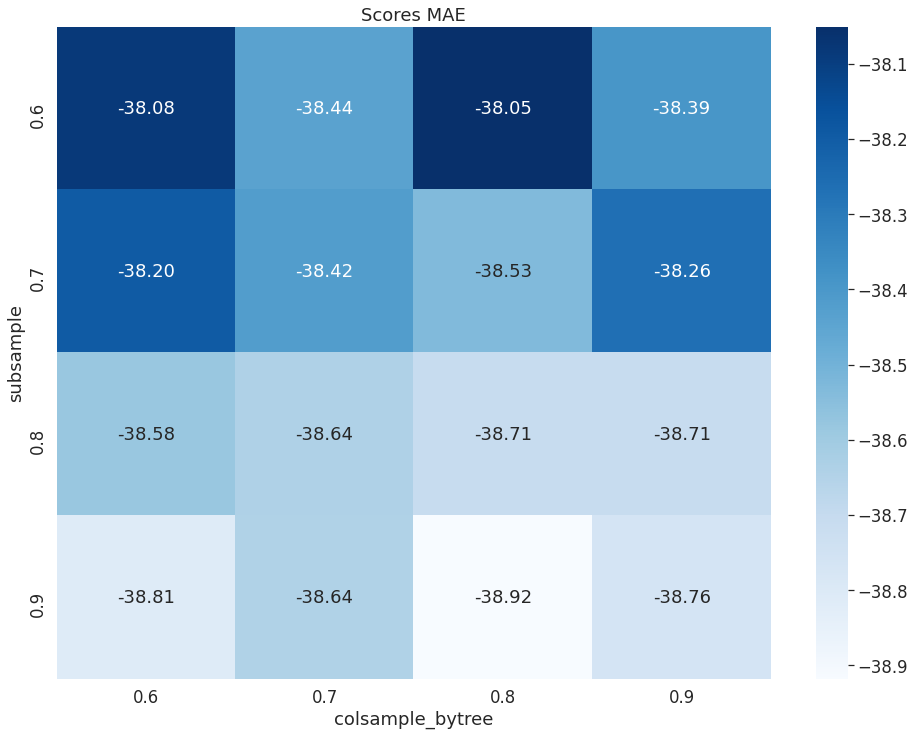

In [ ]:
from matplotlib.ticker import PercentFormatter

score_matrix = np.asarray(grid_cv_sampling.cv_results_["mean_test_score"]).reshape((4, 4))

sns.set(font_scale=1.5)

fig = plt.figure(figsize=(16, 12))
plt.title("Scores MAE")

ax = sns.heatmap(
    score_matrix,  # Matrice des scores
    annot=True,  # Afficher les scores
    fmt='.02f',  # Affichage avec 1 chiffre après la virgule
    yticklabels=grid_parameters["subsample"],  # Nom de l'axe vertical
    xticklabels=grid_parameters["colsample_bytree"],  # Nom de l'axe horizontal
    cmap="Blues",  # Palette de couleur
)

sns.set(font_scale=1)

ax.set(ylabel="subsample", xlabel="colsample_bytree")

plt.show()

In [ ]:
params = {
    # Déjà optimisé
    'max_depth': 8,
    'min_child_weight': 5,
    'gamma': 0,
    'subsample': 0.9,
    'colsample_bytree': 0.6,
    
    'learning_rate': 1,
    'objective':'reg:squarederror',
    'n_estimators': 200,
    'silent': False
}

optim_booster = XGBRegressor(**params)
optim_booster.fit(
    X_train, y_train,
    eval_metric='mae', eval_set = [(X_test, y_test)],
    early_stopping_rounds=10,
    verbose=True
)

[0]	validation_0-mae:35.7812
Will train until validation_0-mae hasn't improved in 10 rounds.
[1]	validation_0-mae:32.7092
[2]	validation_0-mae:31.2967
[3]	validation_0-mae:28.6441
[4]	validation_0-mae:27.8049
[5]	validation_0-mae:27.5608
[6]	validation_0-mae:26.1903
[7]	validation_0-mae:25.6049
[8]	validation_0-mae:25.1112
[9]	validation_0-mae:24.6021
[10]	validation_0-mae:24.2319
[11]	validation_0-mae:23.7895
[12]	validation_0-mae:23.1674
[13]	validation_0-mae:23.0481
[14]	validation_0-mae:22.4698
[15]	validation_0-mae:22.1718
[16]	validation_0-mae:21.9212
[17]	validation_0-mae:21.5084
[18]	validation_0-mae:21.1767
[19]	validation_0-mae:20.886
[20]	validation_0-mae:20.3345
[21]	validation_0-mae:20.1147
[22]	validation_0-mae:19.982
[23]	validation_0-mae:19.716
[24]	validation_0-mae:19.4012
[25]	validation_0-mae:19.1373
[26]	validation_0-mae:18.7605
[27]	validation_0-mae:18.4902
[28]	validation_0-mae:18.2272
[29]	validation_0-mae:18.0678
[30]	validation_0-mae:17.6389
[31]	validation_0-m

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=1, max_delta_step=0,
             max_depth=8, min_child_weight=5, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=False, subsample=0.9, verbosity=1)

In [ ]:
print("MAE train : {:2.1f}€".format(mean_absolute_error(y_train, optim_booster.predict(X_train))))
print("MAE test : {:2.1f}€".format(mean_absolute_error(y_test, optim_booster.predict(X_test))))

print("Score R2 train : {:2.1f}%".format(r2_score(y_train, optim_booster.predict(X_train)) * 100))
print("Score R2 test : {:2.1f}%".format(r2_score(y_test, optim_booster.predict(X_test)) * 100))

MAE train : 5.7€
MAE test : 6.5€
Score R2 train : 98.4%
Score R2 test : 97.4%


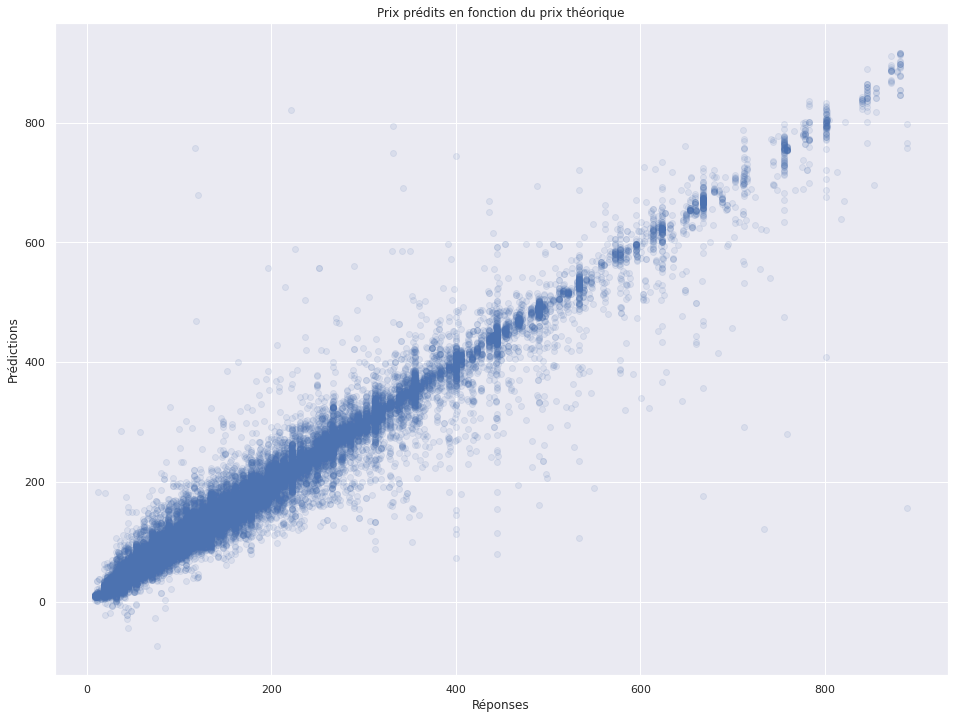

In [ ]:
plt.figure(figsize=(16,12))
plt.scatter(y_test, optim_booster.predict(X_test), alpha=0.1)
plt.xlabel("Réponses")
plt.ylabel("Prédictions")
plt.title("Prix prédits en fonction du prix théorique")
plt.show()

In [ ]:
import pickle

pickle.dump(optim_booster, open("xgboost.pickle", "wb"))